# Day 08. Exercise 03
# Overfitting

## 0. Imports

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import (
  train_test_split
)

from sklearn.linear_model import (
  LogisticRegression
)

from sklearn.tree import (
  DecisionTreeClassifier,
  plot_tree
)

from sklearn.svm import (
  SVC
)

from sklearn.metrics import (
  accuracy_score
)

from sklearn.inspection import (
  DecisionBoundaryDisplay
)

from sklearn.preprocessing import (
  StandardScaler,
  OneHotEncoder
)

from sklearn.pipeline import make_pipeline

from sklearn.multiclass import OneVsRestClassifier

from sklearn.ensemble import (
  RandomForestClassifier
)

from sklearn.model_selection import (
  cross_val_score
)
import joblib

## 1. Preprocessing

1. Read the file `dayofweek.csv` to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`.
3. Using, for example, `value_counts()` to check if the distribution of classes is similar in train and test.
4. Use the additional parameter `stratify=` and check the distribution again, now it should be more or less similar in both datasets.

In [29]:
df = pd.read_csv('../ex02/dayofweek.csv')
df

,dayofweek,numTrials,hour,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,4,-0.788667,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4,-0.756764,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4,-0.724861,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,-0.692958,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,-0.661055,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,3,-0.533442,0.945382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,3,-0.629151,0.945382,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,3,-0.597248,0.945382,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,3,-0.565345,0.945382,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
X = df.drop('dayofweek', axis=1)
y = df['dayofweek']

In [31]:
random_state = 21
fit_intercept = False
probability = True

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.2, 
  random_state=random_state,
  stratify=y
)

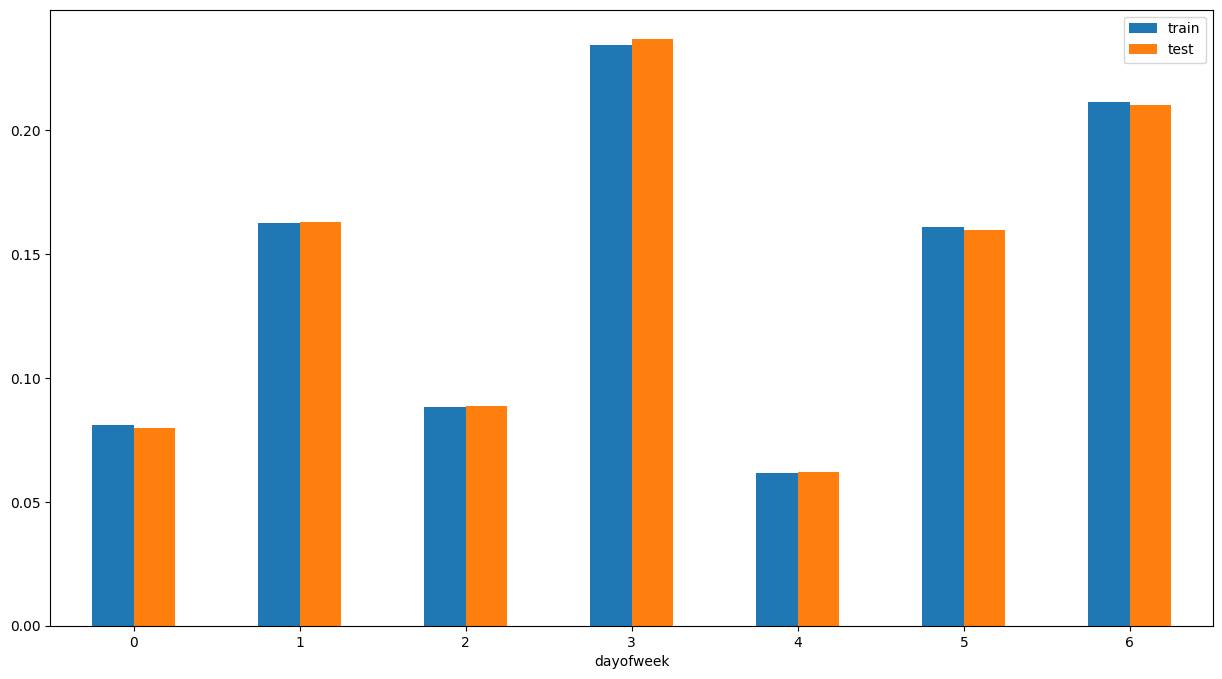

In [33]:
pd.DataFrame(
  [
    y_train.value_counts(normalize=True),
    y_test.value_counts(normalize=True)
  ], 
  index=['train', 'test']
).T.sort_index().plot(kind='bar', figsize=(15, 8), rot=0)
plt.show()

## 2. Baseline models

1. Train exactly the same baseline models from the previous exercise and calculate the accuracies using the test dataset with stratification.
2. Did all the models show the similar values of the metric? Which one has the largest difference comparing the current exercise and the previous? Put the answer to the markdown cell in the end of the section.

### a. Logreg

In [34]:
logreg = LogisticRegression(
  random_state=random_state,
  fit_intercept=fit_intercept,
  solver='liblinear'
)

logreg.fit(X_train, y_train)

LogisticRegression(fit_intercept=False, random_state=21, solver='liblinear')

In [35]:
accuracy_score(y_test, logreg.predict(X_test))

0.6153846153846154

### b. SVM

In [36]:
svc = OneVsRestClassifier(
  SVC(
    kernel='linear',
    random_state=random_state,
    probability=probability
  )
)

svc.fit(X_train, y_train)
accuracy_score(y_test, svc.predict(X_test))

0.6183431952662722

### c. Decision tree

In [37]:
tree = DecisionTreeClassifier(
  random_state=random_state,
  max_depth=4
)
tree.fit(X_train, y_train)
accuracy_score(y_test, tree.predict(X_test))

0.5295857988165681

### d. Random forest

In [38]:
forest = RandomForestClassifier(
  n_estimators=100,
  max_depth=25,
  random_state=random_state
)

forest.fit(X_train, y_train)
accuracy_score(y_test, forest.predict(X_test))

0.9289940828402367

- No
- Random forest

## 3. Crossvalidation

We could play with parameters of the model trying to achive a better accuracy on the test dataset, but it is a bad practice. It leads us again to overfitting. Test dataset is only for checking quality of a final model.

But there is another way of solving the problem – crossvalidation. It does not use test dataset, but creates one more split of train dataset. Again, there are different ways of doing it, but the common thing is that there is a validation dataset that is used for hyperparameters optimization.

1. Using `cross_val_score` with `cv=10` calculate the mean accuracy and standard deviation for every model that you used before (logreg with `solver='liblinear'`, SVC, decision tree, random forest).

### a. Logreg

In [51]:
scores = cross_val_score(
  logreg,
  cv=10,
  X=X,
  y=y,
  scoring='accuracy'
)

np.mean(scores), np.std(scores)

(np.float64(0.45291983657368284), np.float64(0.16960708432126997))

### b. SVM

In [52]:
scores = cross_val_score(
  svc,
  cv=10,
  X=X,
  y=y,
  scoring='accuracy'
)

np.mean(scores), np.std(scores)

(np.float64(0.4422513384051846), np.float64(0.14139746644132703))

### c. Decision tree

In [53]:
scores = cross_val_score(
  tree,
  cv=10,
  X=X,
  y=y,
  scoring='accuracy'
)

np.mean(scores), np.std(scores)

(np.float64(0.3883523527754297), np.float64(0.11835394295385691))

### d. Random forest

In [54]:
scores = cross_val_score(
  forest,
  cv=10,
  X=X,
  y=y,
  scoring='accuracy'
)

np.mean(scores), np.std(scores)

(np.float64(0.6607847280924204), np.float64(0.17462799234675505))

## 4. Optimization

1. Choose the best model and play a little bit with the parameters on cross-validation, find a good enough parameter or a combination of the parameters.
2. Calculate the accuracy for the final model on the test dataset.
3. Draw a plot that displays the top-10 most  important features for that model.
4. Save the model using `joblib`.
5. Load the model, make predictions for the test dataset and calculate the accuracy.

In [55]:
def plot_top_features(coefficients, feature_names, top_n=10, title="Top Feature Importances"):
    """
    Plots a horizontal bar chart of the top-n most important features based on model coefficients.

    Parameters:
        coefficients (array-like): Coefficients or feature importances from a model.
        feature_names (list): List of feature names (same length as coefficients).
        top_n (int): Number of top features to display.
        title (str): Title of the plot.
    """
    
    top_indices = np.argsort(coefficients)[-top_n:]

    top_features = feature_names[top_indices]
    top_coefficients = coefficients[top_indices]

    importance_df = pd.DataFrame({
        'Feature': top_features,
        'Coefficient': top_coefficients
    })
    importance_df.plot(kind='barh', x='Feature', y='Coefficient', title=title, figsize=(15, 8))

    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

In [59]:
accuracy_score(y_test, forest.predict(X_test))

0.9289940828402367

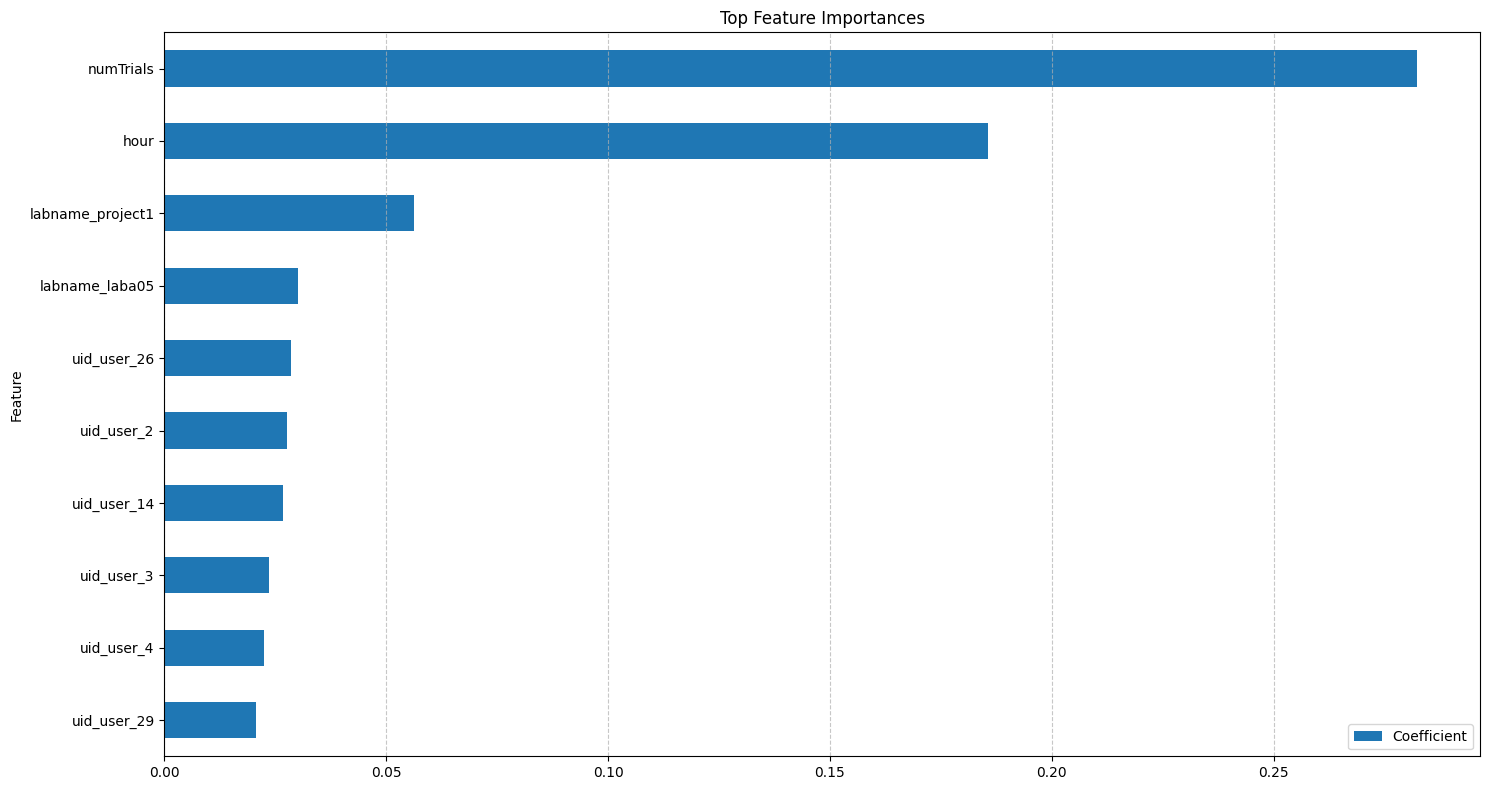

In [60]:
plot_top_features(forest.feature_importances_, X.columns, top_n=10)

In [62]:
joblib.dump(forest, 'model.joblib');

In [63]:
loaded_model = joblib.load('model.joblib')

In [64]:
accuracy_score(y_test, loaded_model.predict(X_test))

0.9289940828402367